In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE 

# 1. โหลดข้อมูล
data = pd.read_csv('updated_cleaned_patient_data.csv')

# 2. เตรียม Features และ Target
feature_cols = [
    'FBS', 'BMI', 'Diabetes', 'age', 'hypertension',
    'vegetarian (1= yes, 0=no)', 'Exercise (min/week)',
    'Cholesterol', 'Living_Area_Code', 'Marriage_Status_Code'
]
X = data[feature_cols].fillna(0)
y = data['stroke']

# 3. แบ่งข้อมูลเป็น Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Scaling (สำคัญมากสำหรับ KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. แก้ปัญหา Recall ต่ำด้วย SMOTE (สร้างข้อมูลกลุ่มที่ "เป็นโรค" เพิ่มให้สมดุล)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# ---------------------------------------------------------
# โมเดลที่ 1: Decision Tree (ปรับจูนเบื้องต้น)
# ---------------------------------------------------------
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train_res, y_train_res)
tree_pred = tree_model.predict(X_test_scaled)

# ---------------------------------------------------------
# โมเดลที่ 2: KNN (ปรับลด k และใช้ weights='distance' เพื่อเพิ่ม Recall)
# ---------------------------------------------------------
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
knn_model.fit(X_train_res, y_train_res)
knn_pred = knn_model.predict(X_test_scaled)

# ---------------------------------------------------------
# 6. แสดงผลลัพธ์เปรียบเทียบ
# ---------------------------------------------------------
print("=== [RESULT] DECISION TREE ===")
print(f"Accuracy: {accuracy_score(y_test, tree_pred):.4f}")
print(classification_report(y_test, tree_pred))

print("\n" + "="*30 + "\n")

print("=== [RESULT] KNN (Improved) ===")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(classification_report(y_test, knn_pred))

ModuleNotFoundError: No module named 'imblearn'

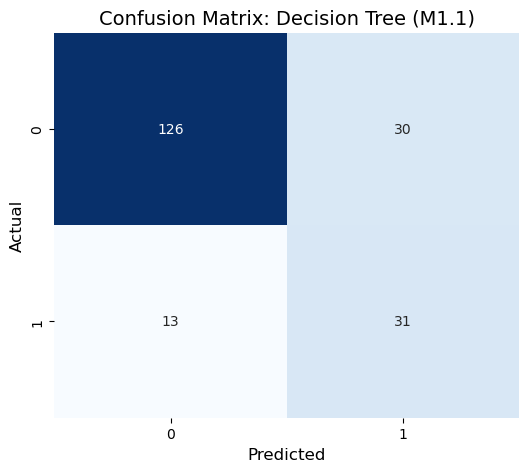

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. กำหนดข้อมูลที่คำนวณได้จากตาราง Decision Tree (M1.1)
# รูปแบบ: [[TN, FP], [FN, TP]]
# TN = True Negative (คลาส 0 ทายถูกว่าเป็น 0)
# FP = False Positive (คลาส 0 ทายผิดว่าเป็น 1)
# FN = False Negative (คลาส 1 ทายผิดว่าเป็น 0)
# TP = True Positive (คลาส 1 ทายถูกว่าเป็น 1)
cm_data = np.array([[126, 30], 
                    [13, 31]])

# 2. ตั้งค่าฉลาก (Labels)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm_data.flatten()]

# จัดรูปแบบข้อความในแต่ละช่อง
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

# 3. สร้างกราฟ Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_data, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])

# 4. ตกแต่งกราฟ
plt.title('Confusion Matrix: Decision Tree (M1.1)', fontsize=14)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

plt.show()

In [4]:
import pandas as pd 
data = pd.read_csv('updated_cleaned_patient_data.csv')
data.groupby('stroke').count()

,FBS,BMI,Diabetes,age,hypertension,"vegetarian (1= yes, 0=no)",Exercise (min/week),Cholesterol,Living_Area_Code,Marriage_Status_Code
stroke,,,,,,,,,,
0,751,751,751,751,751,751,732,751,751,751
1,249,249,249,249,249,249,242,249,249,249
